In [41]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


sns.set()

#-------------------- 차트 관련 속성 (한글처리, 그리드) -----------
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

#-------------------- 주피터 , 출력결과 넓이 늘리기 ---------------
# from IPython.core.display import display, HTML
from IPython.display import display, HTML

display(HTML("<style>.container{width:100% !important;}</style>"))
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth', None)

import warnings
warnings.filterwarnings(action='ignore')

In [42]:
import tensorflow as tf
tf.random.set_seed(1234)
np.random.seed(1234)

In [43]:
from keras.datasets import fashion_mnist

In [44]:
(X_train,y_train), (X_test,y_test) = fashion_mnist.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [45]:
X_train.shape 

(60000, 28, 28)

In [46]:
X_train.reshape(60000, -1).shape

(60000, 784)

In [47]:
X_train = X_train.reshape(60000, -1)
X_test  = X_test.reshape(10000, -1)


In [48]:
X_train_scaler = X_train / 255.0
X_test_scaler  = X_test / 255.0

In [49]:
from keras.layers import Dense
from keras import Sequential
from keras.initializers import GlorotNormal  #Xavier

In [50]:
model = Sequential()
model.add(Dense(units=300, input_dim=28*28, activation='relu', kernel_initializer='glorot_normal')) #입력층
model.add(Dense(units=100,  activation='relu'))              #히든레이어
model.add(Dense(units=60,  activation='relu'))              #히든레이어
model.add(Dense(units=10,  activation='softmax'))           #3종 출력층
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [51]:
fit_history = model.fit(X_train_scaler, y_train
                        , batch_size = 128
                        , validation_split=0.2, epochs=10)
print(fit_history)
print ( model.evaluate(X_test_scaler, y_test)  )

Epoch 1/10
375/375 [==============================] - 2s 3ms/step - loss: 0.5575 - accuracy: 0.8009 - val_loss: 0.4187 - val_accuracy: 0.8493
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 0.3796 - accuracy: 0.8624 - val_loss: 0.3911 - val_accuracy: 0.8559
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.3404 - accuracy: 0.8756 - val_loss: 0.3766 - val_accuracy: 0.8583
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 0.3149 - accuracy: 0.8839 - val_loss: 0.3693 - val_accuracy: 0.8645
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 0.2947 - accuracy: 0.8903 - val_loss: 0.3213 - val_accuracy: 0.8814
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 0.2793 - accuracy: 0.8964 - val_loss: 0.3396 - val_accuracy: 0.8789
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 0.2667 - accuracy: 0.9001 - val_loss: 0.3301 - val_accuracy: 0.8812
Epoch 

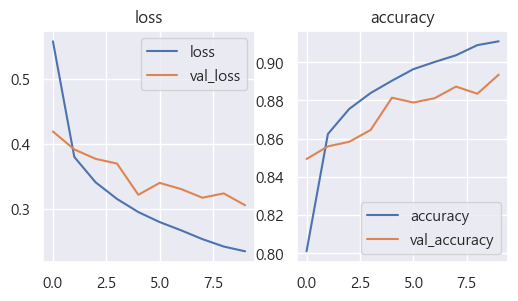

In [52]:
plt.figure(figsize=(6,3))
ax1 = plt.subplot(1,2,1)
ax1.plot(fit_history.history['loss']    , label='loss')
ax1.plot(fit_history.history['val_loss'], label='val_loss')
ax1.legend()
ax1.set_title("loss")

ax2 = plt.subplot(1,2,2)
ax2.plot(fit_history.history['accuracy']    , label='accuracy')
ax2.plot(fit_history.history['val_accuracy'], label='val_accuracy')
ax2.legend()
ax2.set_title("accuracy")

plt.show()

# CNN

In [56]:
from keras.models import Sequential
from keras.layers import Dropout, Conv2D, MaxPool2D, Flatten, Dense
from keras.initializers import GlorotNormal  #Xavier

In [60]:
model = Sequential()
model.add(Conv2D(filters=16, input_shape = (28,28,1), kernel_size = (5,5) , activation = 'relu', kernel_initializer= "glorot_uniform"))
model.add(MaxPool2D(pool_size=(2, 2), strides=None, padding="valid")
model.add(Conv2D(filters=24, kernel_size = (5,5) , activation = 'relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=None, padding="valid")


model.add(Flatten())
model.add(Dense(units=60, activiation='relu'))
model.add(Dense(units=60, activiation='softmax'))
model.compile(loss='sparse_catergorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

SyntaxError: invalid syntax (1593411165.py, line 4)

In [75]:
(X_train,y_train), (X_test,y_test) = fashion_mnist.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [80]:
X_train.reshape(60000, -1).shape

(60000, 784)

In [79]:
res = np.expand_dims(X_train, axis=(3))
print(res.ndim, res.shape)  # 세로줄 []

4 (60000, 28, 28, 1)
